In [469]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [470]:
all_data_values = pd.DataFrame()
all_data_generation = pd.DataFrame()
all_data_individual = pd.DataFrame()
for i in range(1,2):
    db_path = "database"+"/db.sqlite"
    print(db_path)
    con = sqlite3.connect(db_path)
    cur = con.cursor()
    res = cur.execute("SELECT * FROM float")
    names = list(map(lambda x: x[0], cur.description))
    values = res.fetchall()
    values = pd.DataFrame(values,columns=names)
    values['run_num'] = i

    res = cur.execute("SELECT * FROM ea_optimizer_generation")
    names = list(map(lambda x: x[0], cur.description))
    generation = res.fetchall()
    generation = pd.DataFrame(generation,columns=names)
    generation['run_num'] = i

    res = cur.execute("SELECT * FROM ea_optimizer_individual")
    names = list(map(lambda x: x[0], cur.description))
    individual = res.fetchall()
    individual = pd.DataFrame(individual,columns=names)
    individual['run_num'] = i
    con.close()
    all_data_values = all_data_values.append(values)
    all_data_generation = all_data_generation.append(generation)
    all_data_individual = all_data_individual.append(individual)
    

database/db.sqlite


/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/1578438936.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/1578438936.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/1578438936.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


In [471]:
all_data_values = pd.DataFrame()
all_data_generation = pd.DataFrame()
all_data_individual = pd.DataFrame()
db_path = "database"+"/db.sqlite"
print(db_path)
con = sqlite3.connect(db_path)
cur = con.cursor()
res = cur.execute("SELECT * FROM float")
names = list(map(lambda x: x[0], cur.description))
values = res.fetchall()
values = pd.DataFrame(values,columns=names)

res = cur.execute("SELECT * FROM ea_optimizer_generation")
names = list(map(lambda x: x[0], cur.description))
generation = res.fetchall()
generation = pd.DataFrame(generation,columns=names)

res = cur.execute("SELECT * FROM ea_optimizer_individual")
names = list(map(lambda x: x[0], cur.description))
individual = res.fetchall()
individual = pd.DataFrame(individual,columns=names)

con.close()
all_data_values = all_data_values.append(values)
all_data_generation = all_data_generation.append(generation)
all_data_individual = all_data_individual.append(individual)

database/db.sqlite


/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/2117036220.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_values = all_data_values.append(values)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/2117036220.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_generation = all_data_generation.append(generation)
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/2117036220.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data_individual = all_data_individual.append(individual)


In [472]:
fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
fmix
full = fmix.set_index('float_id','run_num',).join(all_data_values.set_index('id','run_num'),lsuffix='l')
full['bone_size_avg'] = full['bone_size_sum']/full['bone_count']

/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/1251806050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/1251806050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  fmix = all_data_generation.set_index('individual_id','run_num').join(all_data_individual.set_index('individual_id','run_num'),lsuffix='l')
/var/folders/30/mhmgrgh17yg7pky3_sndswqr0000gn/T/ipykernel_3979/1251806050.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  full = fmix.set_index('float_id','run_num',).join(all_data_values.se

In [473]:
full.columns
cols = 'generation_index','age', 'inverse_age',\
       'birth', 'speed_y', 'speed_x',\
       'relative_speed_y', 'displacement', 'average_z', 'head_balance',\
       'modules_count', 'hinge_count', 'brick_count', 'bone_count',\
       'bone_size_sum', 'hinge_prop', 'brick_prop', 'branching_count',\
       'branching_prop', 'extremities', 'extensiveness', 'extremities_prop',\
       'extensiveness_prop', 'width', 'height', 'coverage', 'proportion',\
       'symmetry', 'hinge_ratio', 'run_num','bone_size_avg'

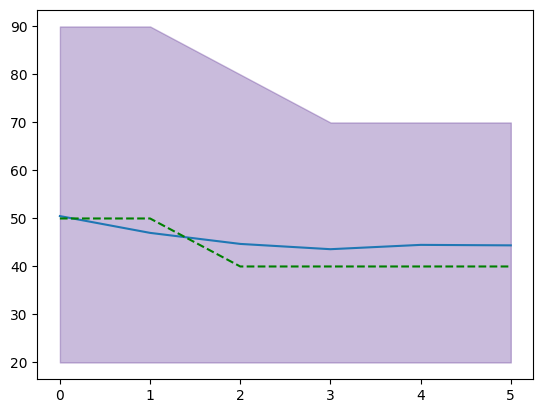

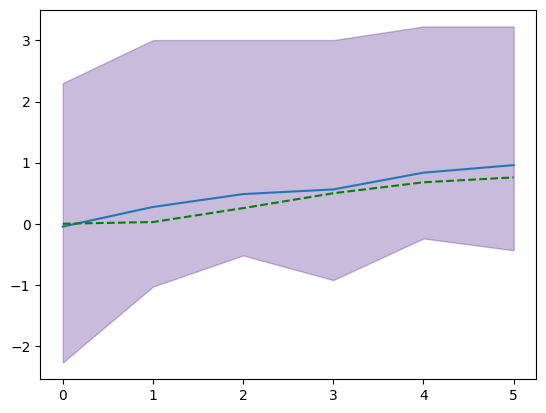

In [474]:
#measure = 'height'

cols = ['sum_mask','speed_y']
for i in cols:
    try:
        clr = plt.cm.Purples(0.9)
        plot_data_min = full[['generation_index',i]].groupby(['generation_index']).min()
        plot_data_max = full[['generation_index',i]].groupby(['generation_index']).max()
        plot_data = full[['generation_index',i]].groupby(['generation_index']).mean()
        plot_data_median = full[['generation_index',i]].groupby(['generation_index']).median()
        fig=plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(plot_data.index,plot_data[i],label = 'mean')
        ax.plot(plot_data_median.index,plot_data_median[i],label = 'median',color='green',linestyle='dashed')
        ax.fill_between(plot_data[i].index, plot_data_min[i], plot_data_max[i], alpha=0.3, edgecolor=clr, facecolor=clr)
        #aplt.plot(plot_data_min.index,plot_data_min[i],label = 'min')
        # plt.plot(plot_data_max.index,plot_data_max[i],label = 'max')
        ax.set_ylim([plot_data_min[i]-2.5,plot_data_max[i]*1.5])
        #plt.update_layout(yaxis_range=[plot_data_min[i].min()-2.5,plot_data_max[i].max()*1.5])
        
        plt.title(i)
        #plt.title = i
        #plt.show()
        plt.savefig('plots/'+i+'.png')
        plt.show()
    except:
        continue

In [475]:
full[["generation_index","individual_index","brain_mask","sum_mask","speed_y"]].sort_values(by=['sum_mask'],ascending=False).head(10)

,generation_index,individual_index,brain_mask,sum_mask,speed_y
99,0,98,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",90.0,-0.525539
107,1,64,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]",90.0,-0.001861
1,0,0,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]",80.0,-0.703433
146,1,54,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]",80.0,0.001657
23,0,22,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]",80.0,0.000141
23,1,47,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]",80.0,0.000141
121,1,76,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]",80.0,0.095105
74,2,36,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]",80.0,0.416616
74,1,2,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]",80.0,0.416616
74,0,73,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]",80.0,0.416616


In [476]:
full[["generation_index","individual_index","brain_mask","sum_mask","speed_y"]].sort_values(by=['speed_y'],ascending=False).head(10)

,generation_index,individual_index,brain_mask,sum_mask,speed_y
477,5,34,"[0, 0, 0, 1, 0, 1, 0, 0, 1, 1]",40.0,3.228406
477,4,91,"[0, 0, 0, 1, 0, 1, 0, 0, 1, 1]",40.0,3.228406
295,2,57,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",30.0,3.005309
295,4,6,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",30.0,3.005309
191,1,78,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",30.0,3.005309
295,3,28,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",30.0,3.005309
295,5,12,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",30.0,3.005309
430,4,95,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",30.0,2.995926
430,5,27,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",30.0,2.995926
534,5,71,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 1]",70.0,2.363513


In [477]:
plot_data_max

,speed_y
generation_index,
0,2.301609
1,3.005309
2,3.005309
3,3.005309
4,3.228406
5,3.228406


In [478]:
all_data_values.sort_values(by=['sum_mask'],ascending=False).head(10)

,id,birth,speed_y,speed_x,relative_speed_y,displacement,average_z,head_balance,modules_count,hinge_count,...,extremities_prop,extensiveness_prop,width,height,coverage,proportion,symmetry,hinge_ratio,brain_mask,sum_mask
222,223,0.0,-0.167868,-0.318443,-0.009875,0.071996,0.049230,0.976153,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]",90.0
98,99,0.0,-0.525539,-0.118773,-0.030914,0.107759,0.032083,0.997318,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",90.0
106,107,0.0,-0.001861,0.019106,-0.000109,0.003839,0.030124,0.999987,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]",90.0
0,1,0.0,-0.703433,0.230795,-0.041378,0.148065,0.031776,0.998463,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]",80.0
145,146,0.0,0.001657,0.004756,0.000097,0.001007,0.030121,0.999992,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]",80.0
299,300,0.0,-0.020615,0.025768,-0.001213,0.006600,0.030125,0.999989,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]",80.0
73,74,0.0,0.416616,-0.283811,0.024507,0.100820,0.035622,0.993190,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]",80.0
22,23,0.0,0.000141,0.003064,0.000008,0.000614,0.030118,0.999991,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]",80.0
247,248,0.0,0.928988,0.169599,0.054646,0.188869,0.031216,0.998741,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 0, 1, 0, 1, 1, 1, 1]",80.0
284,285,0.0,0.001657,0.004756,0.000097,0.001007,0.030121,0.999992,17.0,8.0,...,0.333333,0.8,9.0,9.0,0.209877,1.0,1.0,0.0,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]",80.0
